<h2>Notebook by Damilola Ayodele </h2>

<h1>Sparks Foundation</h1>
<h3> Graduate Rotational Internship Program </h3>
 <h2>Data Science & Analytics Internship Task 2 (Prediction using Unsupervised ML)</h2>

<h3>Tasks<h3>
1. From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Importing libraries needed

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")

<h3>Import the dataset</h3>

In [2]:
df_iris = pd.read_csv("./CSV files/Iris.csv", index_col= "Id")

In [3]:
df_iris.head(n=10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [4]:
df_iris.shape

(150, 5)

In [5]:
df_iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Before finding the number of clusters, there is need to check the data for missing values and descrbing our dataset

In [6]:
df_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df_iris["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

There are no null values so let's visualize the data to get more information

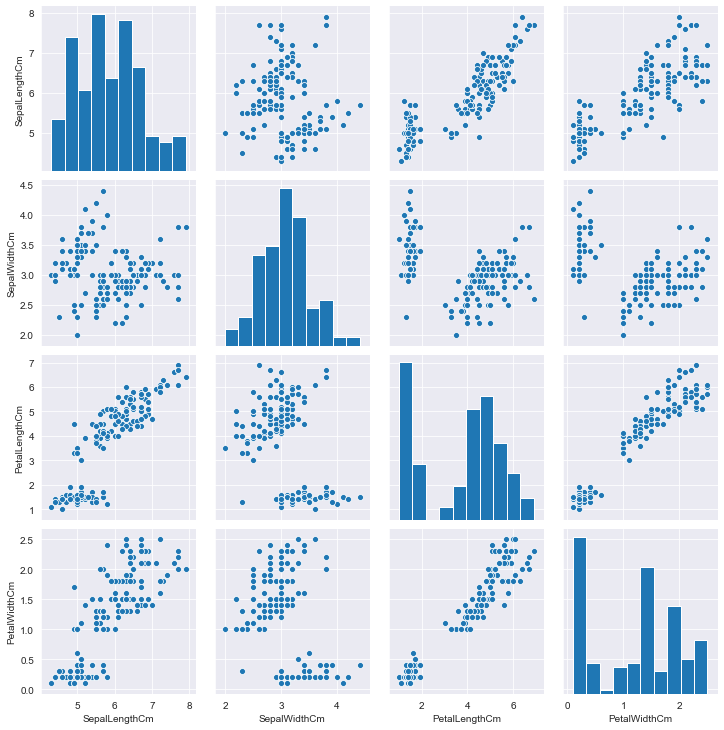

In [9]:
sns.pairplot(df_iris)

In [10]:
cm_cols = [col_name for col_name in df_iris.columns if "Cm" in col_name]
cm_cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

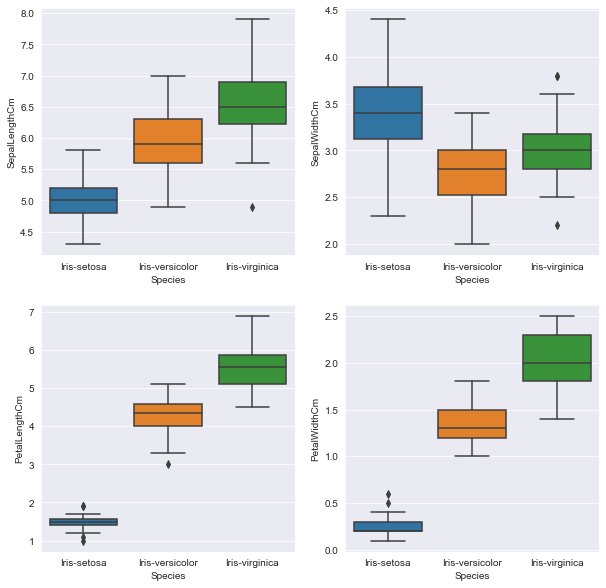

In [11]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
for i in range(0, len(cm_cols)):
    rows = i // 2
    cols = i% 2
    ax = axs[rows, cols]
    plot = sns.boxplot(y = cm_cols[i], x = "Species", data = df_iris, ax=ax)

As can bee seen in the above plots,there are outliers that will affect the clustering so standardizing the data is done

In [13]:
df = df_iris.iloc[:,0:4]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [14]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(df)

The scaled data is converted into a DtaFrame

In [15]:
df1 = pd.DataFrame(iris_scaled)
df1.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Using the elbow method to find the best value of k for our cluster 

In [16]:
irc = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df1)
    irc.append(kmeans.inertia_)

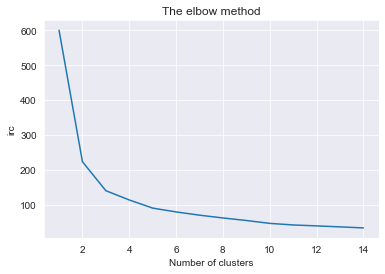

In [17]:
plt.plot(range(1, 15), irc)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('irc') 
plt.show()

The elbow curve above starts at around 3 so the value of k is taken to be 3. Using this to the predict the clusterand the visualization is done

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 20)
iris_kmeans = kmeans.fit_predict(df1)
iris_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [19]:
df1["Clusters"] = iris_kmeans
df1.head()

,0,1,2,3,Clusters
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


In [20]:
df1.Clusters.value_counts()

0    53
1    50
2    47
Name: Clusters, dtype: int64

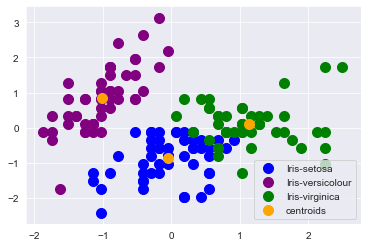

In [24]:
plt.scatter(iris_scaled[iris_kmeans == 0, 0], iris_scaled[iris_kmeans == 0, 1],
           s = 100, c= 'blue', label = 'Iris-setosa')
plt.scatter(iris_scaled[iris_kmeans == 1, 0], iris_scaled[iris_kmeans == 1, 1], 
           s = 100, c= 'purple', label = 'Iris-versicolour')
plt.scatter(iris_scaled[iris_kmeans == 2, 0], iris_scaled[iris_kmeans == 2, 1],
           s = 100, c= 'green', label = 'Iris-virginica')

# Plotting the Centroids of Clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c = 'orange', label = 'centroids')

plt.legend()

#### As seen in the above, the clusters formed are fairly distinct with few overlapping points